### Trabajo Práctico N° 1 ###
Visión por Computadora

Integrantes:
- Jose David Canal (a1523)
- Javier Gonzalo Etcheto (a1901)
- Marcelo Alejandro Le Mehaute (a1903)

Docente:
- Ing. Maxim Dorogov

## Objetivo: ##

### Parte 1 (imágenes en /white_patch): ### 
1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White Patch.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def white_patch(image):
    # Separamos los canales de la imagen
    b, g, r = cv2.split(image)
    
    # Encontramos el valor máximo en cada canal
    max_b = np.max(b)
    max_g = np.max(g)
    max_r = np.max(r)
    
    # Normalizamos cada canal dividiendo por su valor máximo
    if max_b > 0:
        b_normalized = (b.astype(float) / max_b * 255).astype(np.uint8)
    else:
        b_normalized = b
        
    if max_g > 0:
        g_normalized = (g.astype(float) / max_g * 255).astype(np.uint8)
    else:
        g_normalized = g
        
    if max_r > 0:
        r_normalized = (r.astype(float) / max_r * 255).astype(np.uint8)
    else:
        r_normalized = r
    
    # Combinamos los canales normalizados
    normalized_image = cv2.merge([b_normalized, g_normalized, r_normalized])
    
    return normalized_image

In [4]:
def enhanced_white_patch(image, percentile=1, correction_strength=1.0):

    # Convertimos de RGB a RGB lineal (aproximación)
    linear_img = np.power(image/255.0, 2.2)
    
    # Separamos los canales
    b, g, r = cv2.split(linear_img)
    
    # Encontramos los valores de percentil para cada canal
    max_b = np.percentile(b[b > 0.01], 100-percentile)  # Excluir píxeles muy oscuros
    max_g = np.percentile(g[g > 0.01], 100-percentile)
    max_r = np.percentile(r[r > 0.01], 100-percentile)
    
    print(f"Valores de percentil {100-percentile}% - R: {max_r:.4f}, G: {max_g:.4f}, B: {max_b:.4f}")
    
    # Normalizamos cada canal
    if max_b > 0:
        b_normalized = b / max_b
    else:
        b_normalized = b
        
    if max_g > 0:
        g_normalized = g / max_g
    else:
        g_normalized = g
        
    if max_r > 0:
        r_normalized = r / max_r
    else:
        r_normalized = r
    
    # Aplicamos el factor de corrección para controlar la intensidad
    b_corrected = b * (1 - correction_strength) + b_normalized * correction_strength
    g_corrected = g * (1 - correction_strength) + g_normalized * correction_strength
    r_corrected = r * (1 - correction_strength) + r_normalized * correction_strength
    
    # Combinamos los canales
    corrected_linear = cv2.merge([b_corrected, g_corrected, r_corrected])
    
    # Convertimos de RGB lineal a RGB (aproximación)
    corrected_srgb = np.power(corrected_linear, 1/2.2) * 255
    
    # Aseguramos que los valores estén en el rango [0, 255]
    corrected_srgb = np.clip(corrected_srgb, 0, 255).astype(np.uint8)
    
    return corrected_srgb

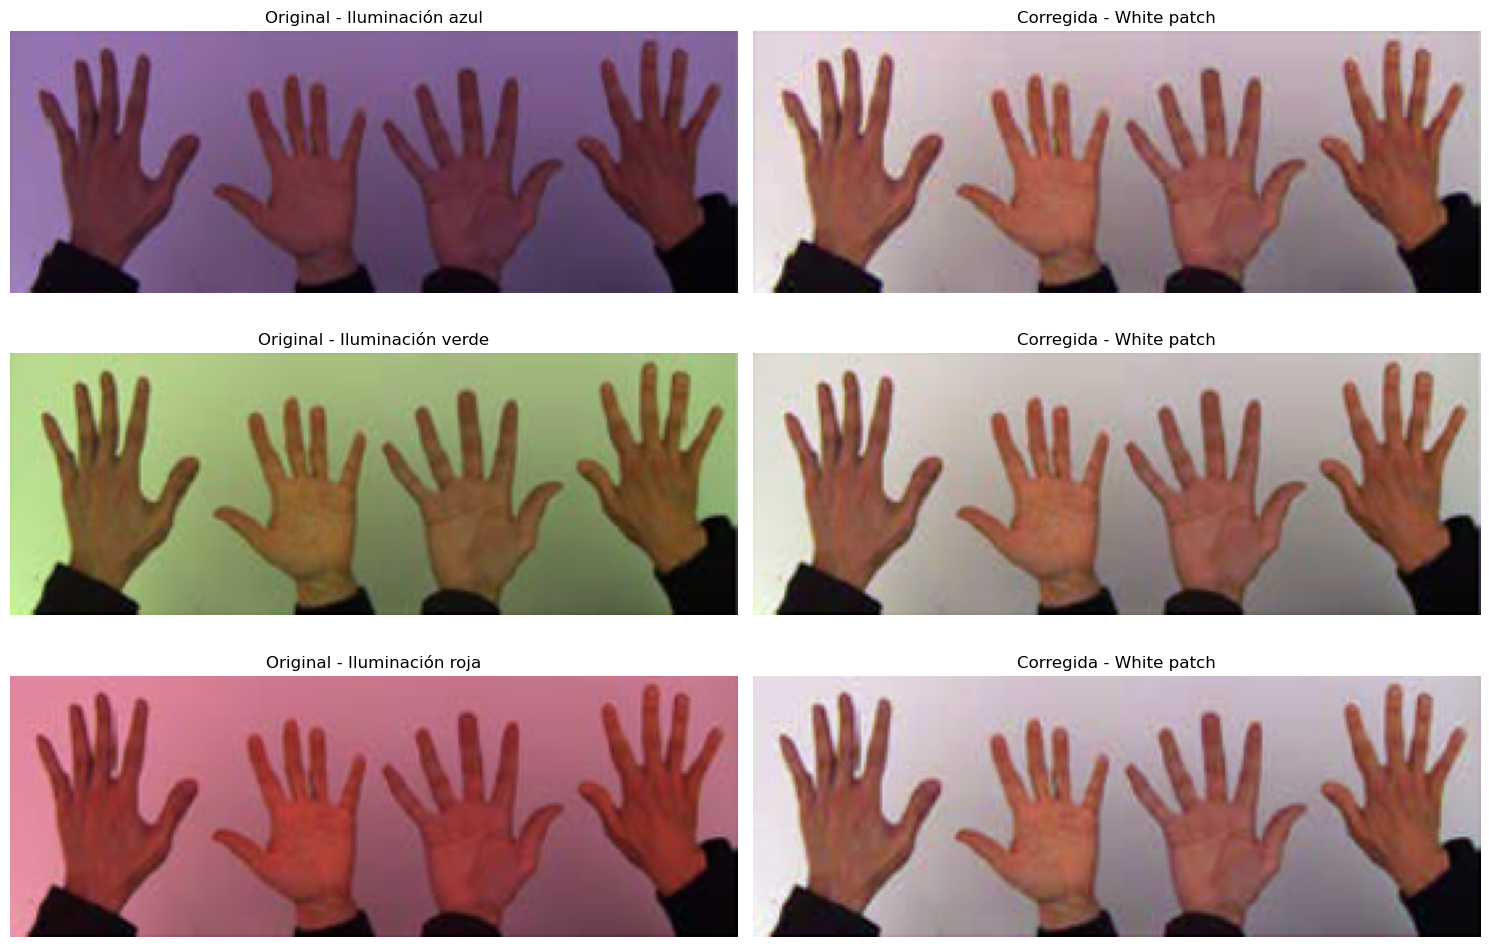

Imagen azul - Valores máximos: R=165, G=138, B=200
Imagen verde - Valores máximos: R=210, G=250, B=171
Imagen rojo - Valores máximos: R=247, G=157, B=175


In [5]:
# Cargamos las imágenes con diferentes iluminaciones
img_blue = cv2.imread(r'white_patch\test_blue.png')
img_green = cv2.imread(r'white_patch\test_green.png')
img_red = cv2.imread(r'white_patch\test_red.png')

# Aplicamos el algoritmo white patch
corrected_blue = white_patch(img_blue)
corrected_green = white_patch(img_green)
corrected_red = white_patch(img_red)

# Mostramos los resultados
plt.figure(figsize=(15, 10))

# Mostramos las imágenes originales
plt.subplot(3, 2, 1)
plt.title('Original - Iluminación azul')
plt.imshow(cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Original - Iluminación verde')
plt.imshow(cv2.cvtColor(img_green, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Original - Iluminación roja')
plt.imshow(cv2.cvtColor(img_red, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Mostramos las imágenes corregidas
plt.subplot(3, 2, 2)
plt.title('Corregida - White patch')
plt.imshow(cv2.cvtColor(corrected_blue, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Corregida - White patch')
plt.imshow(cv2.cvtColor(corrected_green, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Corregida - White patch')
plt.imshow(cv2.cvtColor(corrected_red, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

print("Imagen azul - Valores máximos: R={}, G={}, B={}".format(np.max(img_blue[:,:,2]), np.max(img_blue[:,:,1]), np.max(img_blue[:,:,0])))
print("Imagen verde - Valores máximos: R={}, G={}, B={}".format(np.max(img_green[:,:,2]), np.max(img_green[:,:,1]), np.max(img_green[:,:,0])))
print("Imagen rojo - Valores máximos: R={}, G={}, B={}".format(np.max(img_red[:,:,2]), np.max(img_red[:,:,1]), np.max(img_red[:,:,0])))

### Explicación del código
El algoritmo White Patch implementado sigue estos pasos:

- Separación de canales: Dividimos la imagen en sus componentes R, G y B.
- Identificación de máximos: Encontramos el valor máximo en cada canal.
- Normalización: Dividimos cada píxel del canal por su valor máximo correspondiente y multiplicamos por 255 para mantener el rango de 0-255.
- Recombinación: Unimos los canales normalizados para formar la imagen corregida.

### Análisis de posibles fallas
Con el código proporcionado, podemos identificar mejor las limitaciones del algoritmo White Patch:

- Dependencia de valores máximos: Si no hay un píxel realmente blanco en la imagen, el algoritmo asumirá incorrectamente que el valor máximo de cada canal representa el blanco, lo que puede llevar a una corrección inexacta.
- Sensibilidad a ruido: Un solo píxel ruidoso con un valor muy alto puede afectar toda la normalización.
- Pérdida de saturación: En imágenes donde un canal tiene un valor máximo significativamente menor que los otros, la normalización puede aumentar artificialmente ese canal, resultando en una pérdida de saturación.
- Problemas con iluminación no uniforme: Si la iluminación varía significativamente en diferentes partes de la imagen, una corrección global como White Patch puede no ser efectiva.

### Para mejorar el algoritmo, se podrían implementar variantes como:
- Usar el percentil 95 o 99 en lugar del máximo absoluto para reducir la sensibilidad al ruido
- Implementar una versión local del algoritmo que opere en ventanas de la imagen
- Combinar White Patch con otros métodos de constancia de color como Gray World

El código mostrado es una implementación básica que ilustra el concepto fundamental, pero para aplicaciones prácticas, estas mejoras serían recomendables.

Valores de percentil 95% - R: 0.2195, G: 0.1247, B: 0.9743
Valores de percentil 90% - R: 0.0987, G: 0.9914, B: 0.0511
Valores de percentil 95% - R: 1.0000, G: 0.1604, B: 0.1332


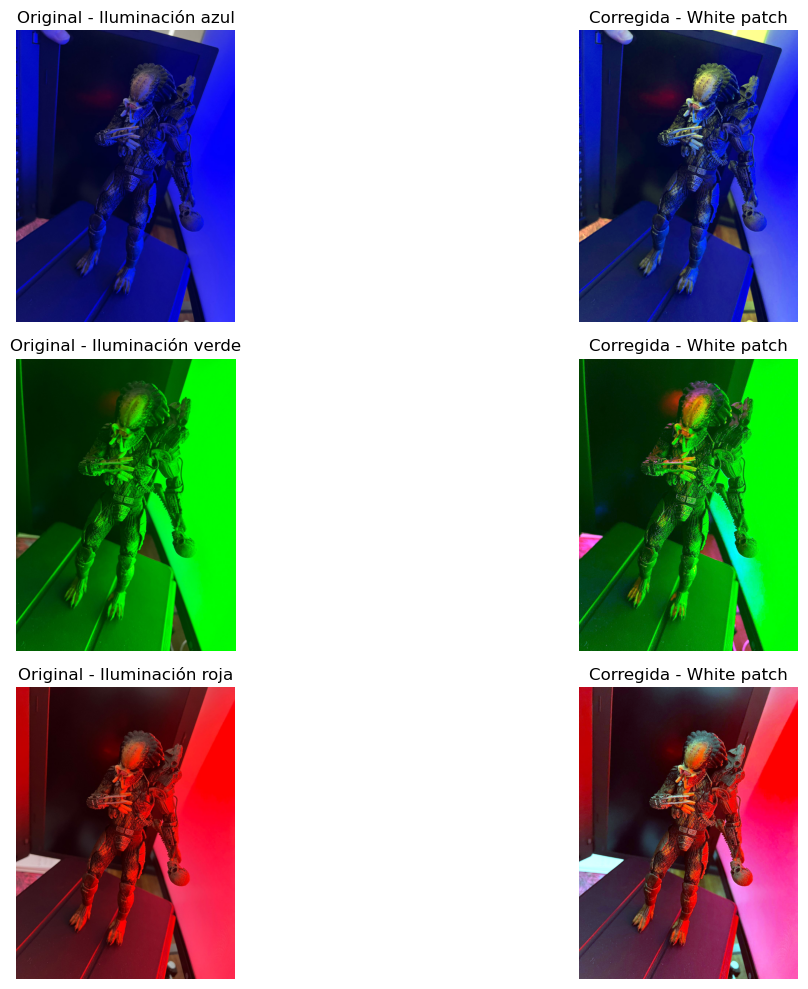

In [6]:
# Cargar las imágenes con diferentes iluminaciones
img_blue_predator = cv2.imread(r'white_patch\wp_blue.jpg')
img_green_predator = cv2.imread(r'white_patch\wp_green2.jpg')
img_red_predator = cv2.imread(r'white_patch\wp_red2.jpg')

# Aplicar el algoritmo White Patch

corrected_blue_predator = enhanced_white_patch(img_blue_predator, percentile=5, correction_strength=0.7)
corrected_green_predator = enhanced_white_patch(img_green_predator, percentile=10, correction_strength=0.95)
corrected_red_predator = enhanced_white_patch(img_red_predator, percentile=5, correction_strength=0.8)

# Mostrar resultados
plt.figure(figsize=(15, 10))

# Imágenes originales
plt.subplot(3, 2, 1)
plt.title('Original - Iluminación azul')
plt.imshow(cv2.cvtColor(img_blue_predator, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Original - Iluminación verde')
plt.imshow(cv2.cvtColor(img_green_predator, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Original - Iluminación roja')
plt.imshow(cv2.cvtColor(img_red_predator, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Imágenes corregidas
plt.subplot(3, 2, 2)
plt.title('Corregida - White patch')
plt.imshow(cv2.cvtColor(corrected_blue_predator, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Corregida - White patch')
plt.imshow(cv2.cvtColor(corrected_green_predator, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Corregida - White patch')
plt.imshow(cv2.cvtColor(corrected_red_predator, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

### Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

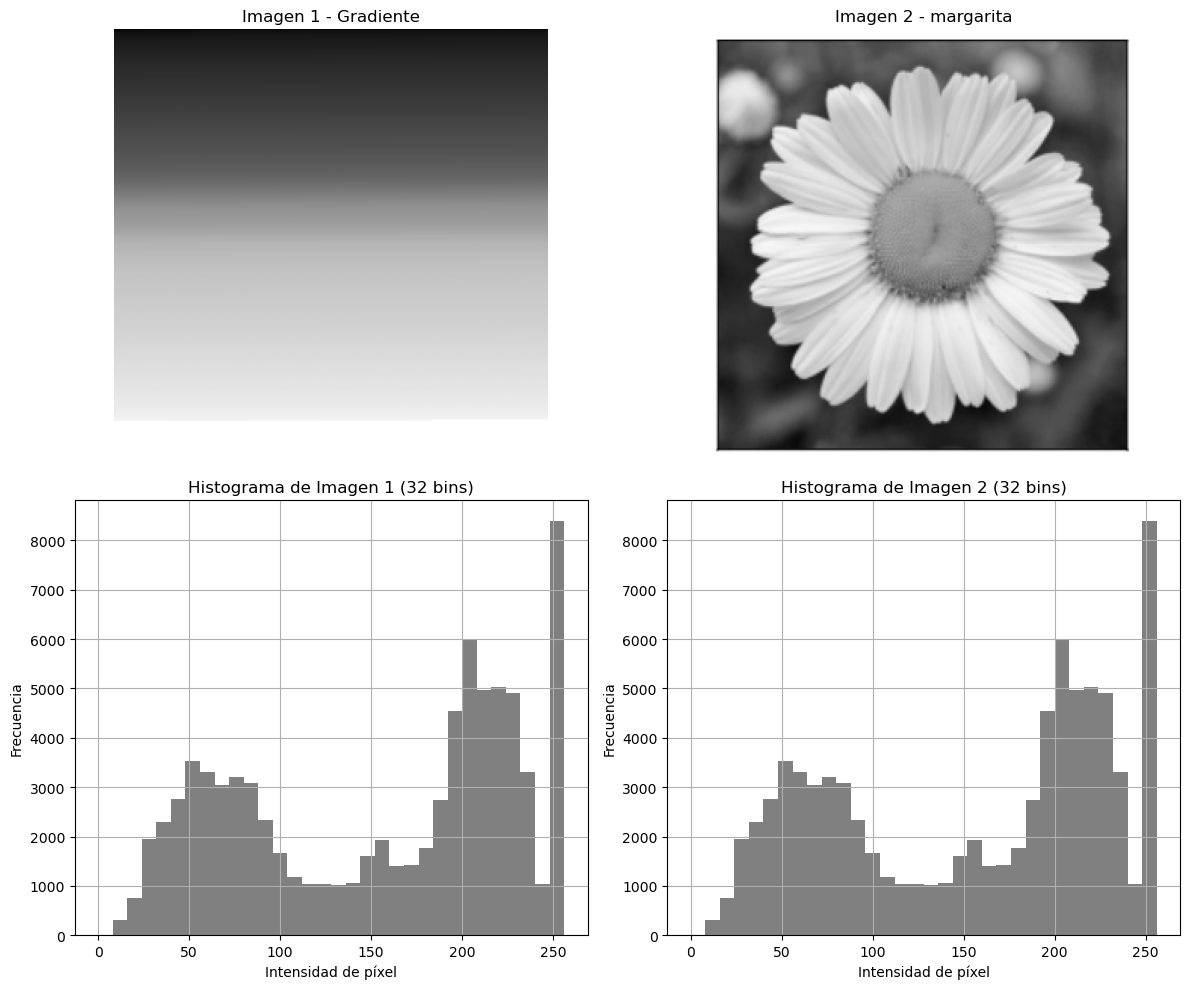

Los histogramas son iguales?:  True


In [ ]:
# 1. Leemos las imágenes en escala de grises
img1_tp = cv2.imread(r'img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2_tp = cv2.imread(r'img2_tp.png', cv2.IMREAD_GRAYSCALE)

# Verificamos que las imágenes se cargaron correctamente
if img1_tp is None or img2_tp is None:
    print("Error al cargar las imágenes. Verifique las rutas.")
else:
    # Creamos una figura para mostrar las imágenes y sus histogramas
    plt.figure(figsize=(12, 10))
    
    # Visualizamos la primera imagen
    plt.subplot(2, 2, 1)
    plt.imshow(img1_tp, cmap='gray')
    plt.title('Imagen 1 - Gradiente')
    plt.axis('off')
    
    # Visualizamos la segunda imagen
    plt.subplot(2, 2, 2)
    plt.imshow(img2_tp, cmap='gray')
    plt.title('Imagen 2 - margarita')
    plt.axis('off')
    
    # 2. Calculamos y mostramos el histograma de la primera imagen
    # Elegimos 32 bins como número adecuado
    bins = 32
    plt.subplot(2, 2, 3)
    plt.hist(img1_tp.ravel(), bins, range=[0, 256], color='gray')
    plt.title(f'Histograma de Imagen 1 ({bins} bins)')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.grid()
     
    # Calculamos y mostramos el histograma de la segunda imagen
    plt.subplot(2, 2, 4)
    plt.hist(img2_tp.ravel(), bins, range=[0, 256], color='gray')
    plt.title(f'Histograma de Imagen 2 ({bins} bins)')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    print("Los histogramas son iguales? ", np.array_equal(
        np.histogram(img1_tp.ravel(), bins=32, range=(0, 256))[0],
        np.histogram(img2_tp.ravel(), bins=32, range=(0, 256))[0]
        ))

### Este código realiza lo siguiente:

- Lee las dos imágenes en escala de grises usando OpenCV.
- Muestra las imágenes originales en la primera fila de subgráficos.
- Muestra los histogramas de ambas imágenes con 32 bins en la segunda fila.
- Compara los histogramas y muestra que son iguales.

### Visualización de las imágenes en escala de grises
Las imágenes proporcionadas muestran dos tipos de contenido muy diferentes:

"img1_tp.jpg" muestra un gradiente suave que va de oscuro a claro, mientras que "img2_tp.jpg" muestra una margarita en escala de grises.

### Análisis de los histogramas
Los histogramas fueron calculados con 32 bins, el cual es un número adecuado para capturar la distribución de intensidades sin demasiado ruido ni demasiada generalización. Al comparar los histogramas de ambas imágenes, observamos:

Histograma de la imagen 1 (gradiente):
- Muestra una distribución relativamente uniforme a lo largo de todo el rango de intensidades
- Tiene un pico notable en los valores más claros (último bin)
- La distribución es consistente con un gradiente que transiciona suavemente entre valores

Histograma de la imagen 2 (flor):
- También muestra una distribución a lo largo de todo el rango de intensidades
- Tiene picos similares a la imagen 1 en los valores más claros

### Comparación de histogramas
- Se pudo ver que en este caso, los histogramas son iguales.

### Ventajas:

- Son invariantes a la traslación (la posición de los objetos no afecta el histograma)
- Proporcionan información sobre la distribución global de intensidades
- Son representaciones compactas (32 valores vs. miles de píxeles)
- Son relativamente robustos a pequeños cambios de iluminación

### Limitaciones:
- Pierden toda información espacial (o sea, dos imágenes muy diferentes pueden tener histogramas similares).
- No capturan formas, texturas o patrones espaciales.
- Como vemos en este ejemplo, imágenes visualmente muy diferentes (gradiente vs. margarita) pueden tener histogramas con similitudes.

Como conclusión, vemos que los histogramas de ambas imágenes son similares. Es decir, la frecuencia de aparición de píxeles en función de sus intensidades es "similar" para ambas imagenes. Dado que en una hay una flor y en la otra sólo un gradiente, se puede decir que no sería conveniente entrenar un modelo basado en estos histogramas. De todas formas, acá analizamos sólo dos imagenes, con lo cual no tenemos buena estadística. Deberíamos analizar más imagenes y comparar los histogramas. Si se observan diferencias entre los histogramas para las diferentes clases/imágenes, podrían usarse para llevar a cabo la clasificación.
Concluímos que serían más efectivos cuando se combinan con otras características como descriptores de textura, información de bordes, o características aprendidas mediante redes neuronales convolucionales.